# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset of Inertial Signals

In [4]:
directory = '/Users/elisap/Downloads/UCI HAR Dataset/train/Inertial Signals/'

In [5]:
df1 = pd.read_csv(directory+'body_acc_x_train.txt', delim_whitespace=True, header=None) #load data

In [6]:
df1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,0.618763,0.774067,0.586568,0.217007,-0.027330,-0.171294,-0.218988,-0.137680,0.033094,...,-0.227949,-0.247119,-0.227710,-0.210942,-0.179295,-0.142085,-0.131831,-0.154000,-0.176886,-0.211068
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,-0.311864,-0.316281,-0.274100,-0.326159,-0.379539,-0.382544,-0.371156,-0.295357,-0.203831,-0.124548
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,-0.177051,-0.248426,-0.313892,-0.367070,-0.395135,-0.347338,-0.319902,-0.294935,-0.243403,-0.215215
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.240819,-0.330930,-0.396854,-0.413906,-0.379085,-0.356609,-0.317618,-0.315016,-0.330737,-0.272348


In [7]:
## conda install -c conda-forge tslearn

In [8]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [9]:
ts = df1.values
ts

array([[ 1.808515e-04,  1.013856e-02,  9.275574e-03, ..., -1.147484e-03,
        -2.222655e-04,  1.575500e-03],
       [ 1.093752e-03,  4.550077e-03,  2.879173e-03, ..., -4.646144e-03,
        -2.941333e-03, -1.598751e-03],
       [ 3.531266e-03,  2.285063e-03, -4.197538e-04, ...,  1.245999e-03,
         3.116783e-03,  2.177658e-03],
       ...,
       [-2.267175e-01, -1.778169e-01, -1.508691e-01, ..., -2.949353e-01,
        -2.434030e-01, -2.152148e-01],
       [-6.480597e-02, -7.993300e-02, -6.834966e-02, ..., -3.150159e-01,
        -3.307374e-01, -2.723475e-01],
       [-1.944707e-01, -1.738025e-01, -1.275446e-01, ..., -7.190685e-02,
        -1.422088e-01, -1.709989e-01]])

# Normalizing the Time Series

In [10]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts.reshape(1,-1))

# Approximate the Time Series using SAX transform

In [11]:
n_paa_segments = 20
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

# Original TS is reduced to this sequence

In [12]:
# ravel() - numpy module which is used to change a 2D array or a multi-dimensional array into a contiguous flattened array.
ts_sax.ravel()

array([4, 4, 5, 4, 4, 5, 4, 5, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 5, 5])

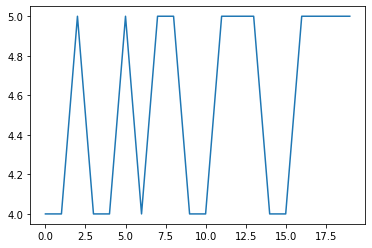

In [13]:
plt.plot(ts_sax.ravel())
plt.show()

In [14]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-0.12566134685507402: 0, 0.0: 1, 0.12566134685507416: 2}

In [15]:
from tslearn.generators import random_walks

In [16]:
X = random_walks(n_ts=100, sz=128, d=1)

In [17]:
X = scaler.fit_transform(X)

In [18]:
X_sax = sax.transform(X)

In [19]:
X_seq = list()
for x in X_sax:
    X_seq.append(x.ravel())

In [20]:
X_seq[0]

array([4, 2, 5, 6, 6, 7, 9, 9, 7, 7, 9, 6, 2, 3, 2, 1, 0, 1, 3, 4])

# Sequential Pattern Mining

In [21]:
#!/Users/elisap/opt/anaconda3/bin/python/ -m pip install prefixspan

In [22]:
from prefixspan import PrefixSpan

https://github.com/chuanconggao/PrefixSpan-py

https://pypi.org/project/prefixspan/

In [23]:
ps = PrefixSpan(X_seq)

#### 

# Check sequential patterns with different min frequencies

In [29]:
# Respective frequency and the pattern
ps.frequent(70)  # param is min freq absolute

[(84, [4]),
 (91, [2]),
 (80, [5]),
 (86, [6]),
 (79, [7]),
 (86, [9]),
 (83, [3]),
 (95, [1]),
 (76, [1, 1]),
 (72, [1, 2]),
 (87, [0]),
 (95, [8]),
 (73, [8, 8])]

In [33]:
ps.frequent(50) 

[(84, [4]),
 (55, [4, 2]),
 (55, [4, 5]),
 (54, [4, 3]),
 (58, [4, 1]),
 (50, [4, 4]),
 (52, [4, 8]),
 (91, [2]),
 (67, [2, 2]),
 (58, [2, 3]),
 (68, [2, 1]),
 (51, [2, 1, 1]),
 (51, [2, 4]),
 (52, [2, 8]),
 (80, [5]),
 (52, [5, 6]),
 (50, [5, 2]),
 (52, [5, 3]),
 (51, [5, 4]),
 (54, [5, 5]),
 (86, [6]),
 (56, [6, 6]),
 (50, [6, 1]),
 (50, [6, 4]),
 (52, [6, 8]),
 (53, [6, 5]),
 (79, [7]),
 (50, [7, 7]),
 (59, [7, 6]),
 (60, [7, 8]),
 (51, [7, 5]),
 (86, [9]),
 (64, [9, 9]),
 (60, [9, 8]),
 (83, [3]),
 (58, [3, 2]),
 (58, [3, 1]),
 (50, [3, 4]),
 (52, [3, 8]),
 (54, [3, 6]),
 (95, [1]),
 (59, [1, 0]),
 (76, [1, 1]),
 (57, [1, 3]),
 (50, [1, 4]),
 (72, [1, 2]),
 (53, [1, 8]),
 (87, [0]),
 (58, [0, 1]),
 (52, [0, 3]),
 (50, [0, 0]),
 (50, [0, 6]),
 (52, [0, 8]),
 (95, [8]),
 (73, [8, 8]),
 (53, [8, 5]),
 (51, [8, 3]),
 (54, [8, 4]),
 (54, [8, 2]),
 (60, [8, 6]),
 (63, [8, 9]),
 (54, [8, 7]),
 (58, [8, 1])]

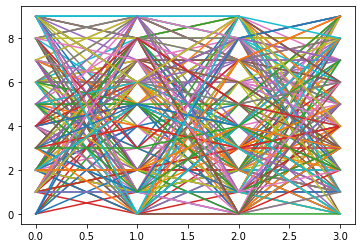

In [31]:
l = n_paa_segments // 5
tr = []

for i in range(10):
 
    #plt.subplot(i+331)
    plt.plot(X_seq[i*l:i*l + l])
    #plt.show()
    tr.append(X_seq[i*l:i*l+l])
    #print(X_seq[i*l:i*l+l])
    #print("\n\n")
    
plt.show()

# Top 10 sequential patterns

In [30]:
ps.topk(10)

[(95, [1]),
 (95, [8]),
 (91, [2]),
 (87, [0]),
 (86, [6]),
 (86, [9]),
 (84, [4]),
 (83, [3]),
 (80, [5]),
 (79, [7])]

# Frequent closed sequential patterns 

A pattern is closed if there is no super-pattern with the same frequency.
The set of closed sequential patterns is usually much smaller but it is lossless, which means that it allows recovering the full set of sequential patterns (no information is loss), which is very convenient.

In [37]:
ps.frequent(60, closed=True)

[(84, [4]),
 (91, [2]),
 (67, [2, 2]),
 (68, [2, 1]),
 (80, [5]),
 (86, [6]),
 (79, [7]),
 (60, [7, 8]),
 (86, [9]),
 (64, [9, 9]),
 (60, [9, 8]),
 (83, [3]),
 (95, [1]),
 (76, [1, 1]),
 (72, [1, 2]),
 (87, [0]),
 (95, [8]),
 (73, [8, 8]),
 (60, [8, 6]),
 (63, [8, 9])]

In [38]:
ps.frequent(45, closed = True)

[(84, [4]),
 (55, [4, 2]),
 (55, [4, 5]),
 (49, [4, 6]),
 (47, [4, 9]),
 (54, [4, 3]),
 (58, [4, 1]),
 (45, [4, 1, 1]),
 (50, [4, 4]),
 (52, [4, 8]),
 (91, [2]),
 (48, [2, 5]),
 (49, [2, 6]),
 (46, [2, 9]),
 (67, [2, 2]),
 (58, [2, 3]),
 (68, [2, 1]),
 (51, [2, 1, 1]),
 (47, [2, 1, 2]),
 (49, [2, 0]),
 (51, [2, 4]),
 (52, [2, 8]),
 (80, [5]),
 (52, [5, 6]),
 (50, [5, 2]),
 (52, [5, 3]),
 (49, [5, 1]),
 (51, [5, 4]),
 (47, [5, 8]),
 (54, [5, 5]),
 (86, [6]),
 (56, [6, 6]),
 (48, [6, 7]),
 (48, [6, 2]),
 (50, [6, 1]),
 (50, [6, 4]),
 (52, [6, 8]),
 (53, [6, 5]),
 (79, [7]),
 (50, [7, 7]),
 (59, [7, 6]),
 (48, [7, 2]),
 (47, [7, 3]),
 (48, [7, 1]),
 (60, [7, 8]),
 (51, [7, 5]),
 (86, [9]),
 (64, [9, 9]),
 (48, [9, 6]),
 (48, [9, 1]),
 (60, [9, 8]),
 (83, [3]),
 (58, [3, 2]),
 (58, [3, 1]),
 (48, [3, 3]),
 (50, [3, 4]),
 (52, [3, 8]),
 (47, [3, 5]),
 (54, [3, 6]),
 (45, [3, 9]),
 (95, [1]),
 (59, [1, 0]),
 (76, [1, 1]),
 (48, [1, 1, 1]),
 (57, [1, 3]),
 (50, [1, 4]),
 (72, [1, 2]),
 (49, [

In [43]:
ps.topk(10, closed=True)

[(95, [1]),
 (95, [8]),
 (91, [2]),
 (87, [0]),
 (86, [6]),
 (86, [9]),
 (84, [4]),
 (83, [3]),
 (80, [5]),
 (79, [7])]